# Logistic Regression wiht a Neural Network mindset

[Coursera Hub](https://hub.coursera-notebooks.org/user/kpnnhdgewrqxkvqxuykncn/tree)

This notebook has to be run in coursera hub.

In [13]:
import numpy  as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [14]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()

### `plt.imshow()`

- plot a 2D image by a (hight\*width\*3) matrix



### `np.squeeze()`
- Before "squeezed", we got a "**`[0]`**"
- after "squeezed", we got a "**`0`**"

In [18]:
index=49
test_set_y[:,index]

array([0])

In [19]:
np.squeeze(test_set_y[:,index])

array(0)

y=[1], it's a cat picture


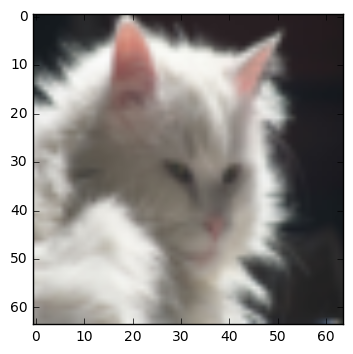

In [20]:
index=8
plt.imshow(test_set_x_orig[index])
print('y='+str(test_set_y[:,index])+ ", it's a " + classes[np.squeeze(test_set_y[:,index])].decode("utf-8")+ " picture")

## Preprocessing: Standardization

### `ndarray.reshape((n,-1))`
- reshape the aarry to n rows and x columns
- x is calculated autoamtically by the length of the array and remaining dimensions.

```python
train_set_x_orig.shape
# (209, 64, 64, 3)

train_set_x_orig.reshape((209,128,-1)).shape
# (209, 128, 96)
```

In [21]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]

train_set_x_flatten=train_set_x_orig.reshape((train_set_x_orig.shape[0],-1)).T
test_set_x_flatten = test_set_x_orig.reshape((test_set_x_orig.shape[0],-1)).T

In [22]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255

In [23]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

## Initializing parameters

In [31]:
def initialize_with_zeros(dim):
#     w=np.random.randn(dim).reshape((dim,1))
    w=np.zeros((dim,1))
    b=0.0
    
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

## Forward & Backward Propagation

### Forward Propagation

In [25]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    
    A=sigmoid(np.dot(w.T,X)+b)
    cost=-(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw=(np.dot(X,(A-Y).T))/m
    db=(np.sum(A-Y))/m
    
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    
    grads={'dw':dw,
           'db':db}
    
    return grads, cost

## Optimization

In [26]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs=[]
    
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0 :
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f"  %(i,cost))
            
    params = {"w":w,
              "b":b}
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

## Prediction

In [27]:
def predict(w,b,X):
    
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)        #assert the shape to avoid bugs
    
    A=sigmoid(np.dot(w.T,X)+b)
    
    Y_prediction=np.where(A>0.5,1,0)
    
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

## Merge all Function into a Model

In [28]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost=False):
    
    w,b=initialize_with_zeros(X_train.shape[0])
    
    parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d={"costs":costs,
       "Y_prediction_test" : Y_prediction_test,
       "Y_prediction_train" : Y_prediction_train,
       "w" : w,
       "b": b,
       "learning_rate" : learning_rate,
       "num_interation" : num_iterations}
    
    return d

In [33]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


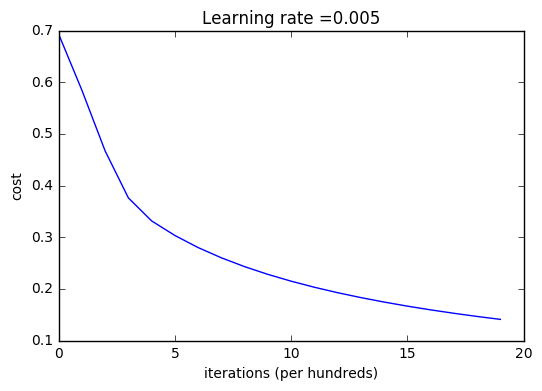

In [68]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Overfitting

<font color ="blue">
**The higher train accuracy you got, the lower test accuracy wll be, cause of OVERFITTING.**

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



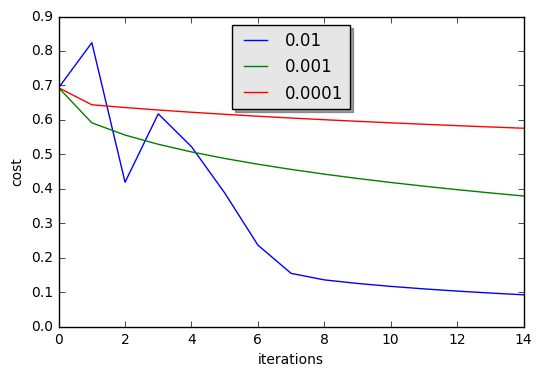

In [35]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Test with my own image

### `scipy.misc.imresize(image,size=(m,n))` 
- stretch the given image to the given size
- this function is to adjust the pixel number of the image, not the array shape

y = 0, your algorithm predicts a "non-cat" picture.


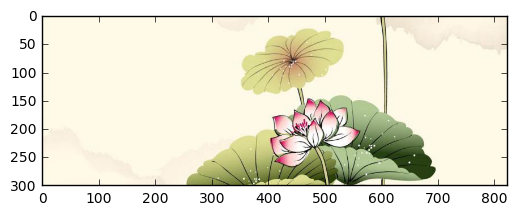

In [67]:
my_iamge="my_image.jpg"
fname="images/" + my_iamge
image = np.array(ndimage.imread(fname, flatten=False))
my_image=scipy.misc.imresize(image,size=(num_px,num_px)).reshape(num_px*num_px*3,1)
my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")